# Create a Logistic Regression Model - Binary Classification
**Objective:** 
Determine if age has a statistical meaning toward purchasing insurance and predict the probability of someone buying insurance

### 1. Import required modules

In [79]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
%matplotlib inline

#### Change directory 

In [80]:
os.chdir("/Users/vydang/Documents/Bioinformatics_Side_Projects/LogisticRegression_ML")

### 2. Import data

In [81]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


### 3. Visualize data with scatter plot

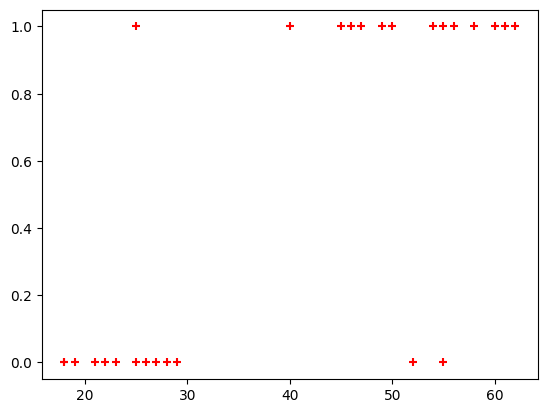

In [82]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

Split data into training and testing dataset

### 4. Create Logistic Regression Model

In [ ]:
# Split data into testing and training dataset
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.9)

In [84]:
x_test

,age
18,19
11,28
14,49


In [85]:
x_train. head(3)

,age
6,55
23,45
9,61


In [86]:
model = LogisticRegression()

In [87]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 5. Make predictions on testing set

In [88]:
predictions = model.predict(x_test)

In [89]:
x_test_predict = x_test.copy()
x_test_predict['predicted'] = predictions

In [90]:
x_test_predict

,age,predicted
18,19,0
11,28,0
14,49,1


**Results**
Showcases that age does determine the probability of the person purchasing insurance.

### 6. Determine the score of the model

In [21]:
model.score(x_test, y_test)

1.0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


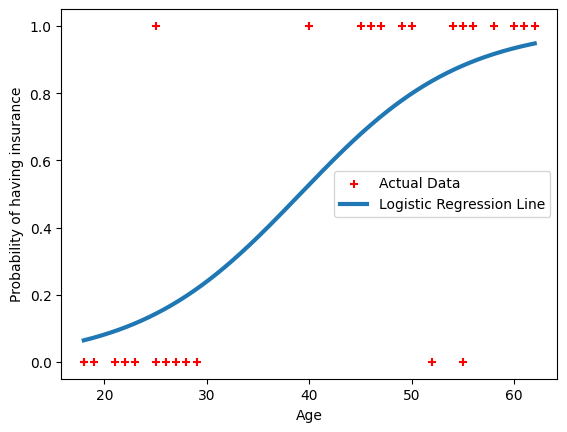

In [26]:
age_range = np.linspace(df.age.min(), df.age.max(), 300).reshape(-1,1)
probabilities = model.predict_proba(age_range)[:, 1]

plt.scatter(df[['age']], df.bought_insurance, label="Actual Data", color='red', marker='+')
plt.plot(age_range, probabilities, linewidth=3, label="Logistic Regression Line")
plt.xlabel("Age")
plt.ylabel("Probability of having insurance")
plt.legend()
plt.show()

# Practice
**Objective:** Create a ML model that determines the employee retention based on most impactful features

**Mini-Objectives:**
1. EDA on which factors impacts on employee retention
2. Bar chart on impact of employee salaries on retention
3. Bar chart showing correlation betwene dept and employee retention
4. Build logistic regression model
5. Accuracy of model

### 1. Import Data

In [57]:
pract_df = pd.read_csv("HR_comma_sep.csv")
pract_df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


### 2. Explore data to determine the features with the biggest impact of employee retention

In [63]:
numeric_df = pract_df.select_dtypes(include=['int64', 'float64'])
numeric_df.groupby(pract_df['left']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


**Results:**
Variables that affect retention: 
- Satisfaction Level
- Promotion within the last 5 years
- Salary Level

In [71]:
subdf = pract_df[['satisfaction_level', 'average_montly_hours','promotion_last_5years', 'salary', 'left']]
subdf.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [ ]:
# Convert salary column to numeric features
subdf_encoded = pd.get_dummies(subdf, columns=['salary'], drop_first=True)
x = subdf_encoded.drop('left', axis=1)
y = subdf_encoded['left']

### 3. Create Logistic Regression Model

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3)

In [74]:
model = LogisticRegression()

In [75]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [76]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(10500,))

### 4. Determine the score of the model

In [77]:
model.score(x_test, y_test)

0.7811428571428571

### Bar Plot - Salary vs Emplotee Retention

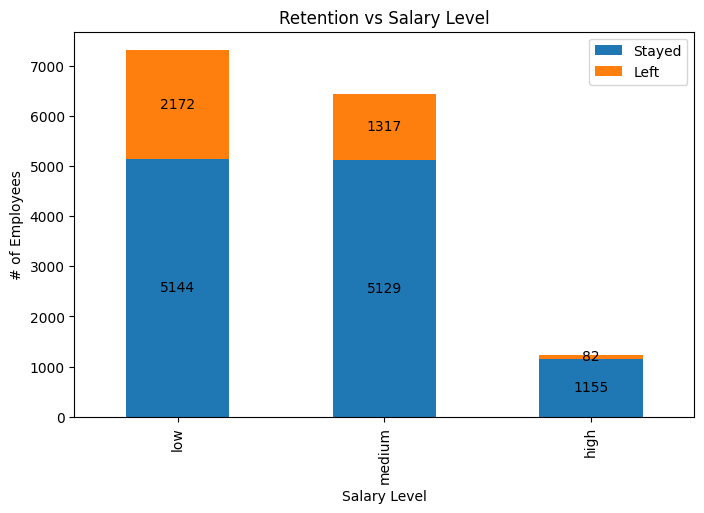

In [ ]:
salary_counts = pract_df.groupby(['salary', 'left']).size().unstack()
# Reindex (order) the salary rows
salary_counts= salary_counts.reindex(['low', 'medium', 'high'])

plots = salary_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

#Labeled the exact number of employees
for container in plots.containers:
    plots.bar_label(container, label_type='center')

plt.xlabel("Salary Level")
plt.ylabel("# of Employees")
plt.title("Retention vs Salary Level")
plt.legend(["Stayed", "Left"])
plt.show()

### Bar Plot - Department vs Employee Retention

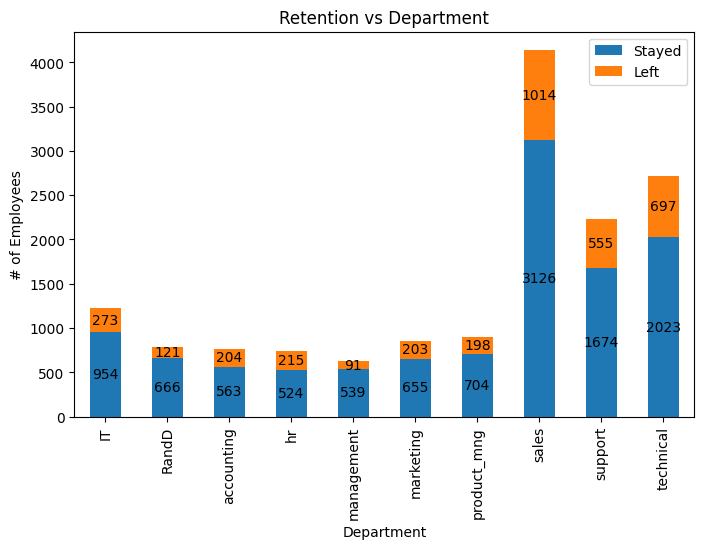

In [67]:
dept_counts = pract_df.groupby(['Department', 'left']).size().unstack()

plots_dept = dept_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

#Labeled the exact number of employees
for container in plots_dept.containers:
    plots_dept.bar_label(container, label_type='center')

plt.xlabel("Department")
plt.ylabel("# of Employees")
plt.title("Retention vs Department")
plt.legend(["Stayed", "Left"])
plt.show()